In [1]:
from importlib.resources import files
from Consensus import *

In [2]:
EXAMPLE_TREES_PATH = files("Consensus.example_data").joinpath("GTRgamma_edit.nex")
EXAMPLE_ASTRAL_TREE_PATH = files("Consensus.example_data").joinpath("astral_GTRgamma.tre")

# Load Data

In [3]:
from Consensus import *
import ete3

In [4]:
input_trees = TreeList_with_support.get(path = EXAMPLE_TREES_PATH, schema = "nexus") # for files containing multiple trees

# please specify the same 'taxon_namespace' object when reading the data


In [5]:
# majority rule consensus
majority = input_trees.majority_rule_consensus()

In [6]:
majority.compute_branch_support(treelist=input_trees)
majority.compute_transfer_support(treelist=input_trees)

In [7]:
string=majority.as_string(schema='newick',suppress_rooting=True)

In [8]:
type(majority.taxon_namespace)

dendropy.datamodel.taxonmodel.TaxonNamespace

In [9]:
t = ete3.Tree(string)
ts=ete3.TreeStyle()

In [10]:
color = ["#006BA4", "#FF800E", "#ABABAB", "#595959",
                 "#5F9ED1", "#C85200", "#898989", "#A2C8EC", "#FFBC79", "#CFCFCF"]
_ = get_support(t,majority.taxon_namespace,majority.branch_support,pos = 0,leaf_support = False)
# legendの追加, color配列用意しなきゃいけなくなったのすごい悲しい
ts.legend.add_face(ete3.TextFace("branch_support",fgcolor=color[0]), column=0)
_ = get_support(t,majority.taxon_namespace,majority.transfer_support,pos = 1,leaf_support = False)
ts.legend.add_face(ete3.TextFace("transfer_support",fgcolor=color[1]), column=0)

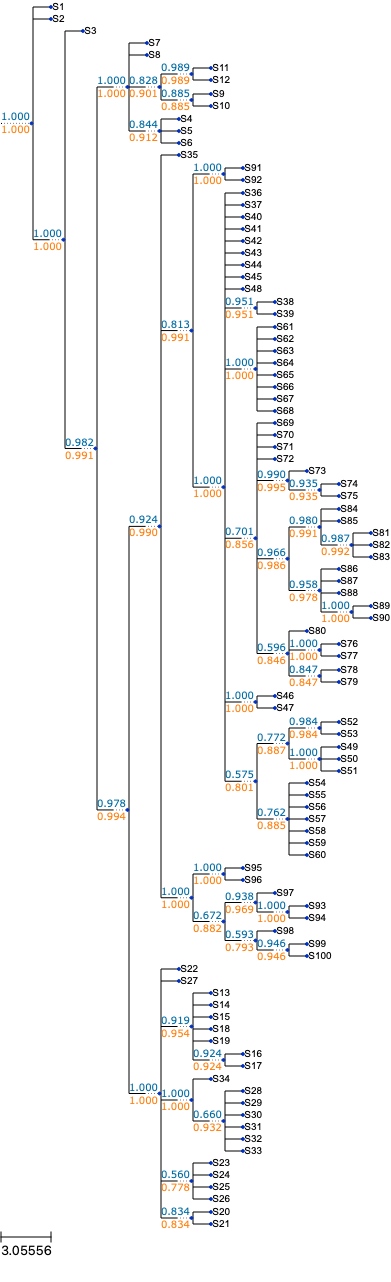

In [11]:
t.render(file_name="%%inline")

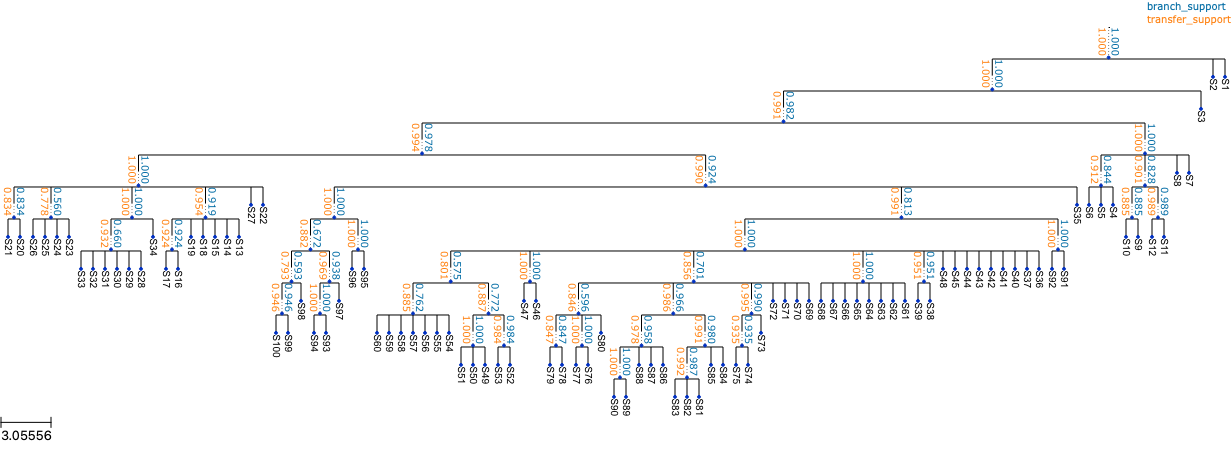

In [12]:
ts.rotation = 90
t.render(file_name="%%inline",tree_style=ts)

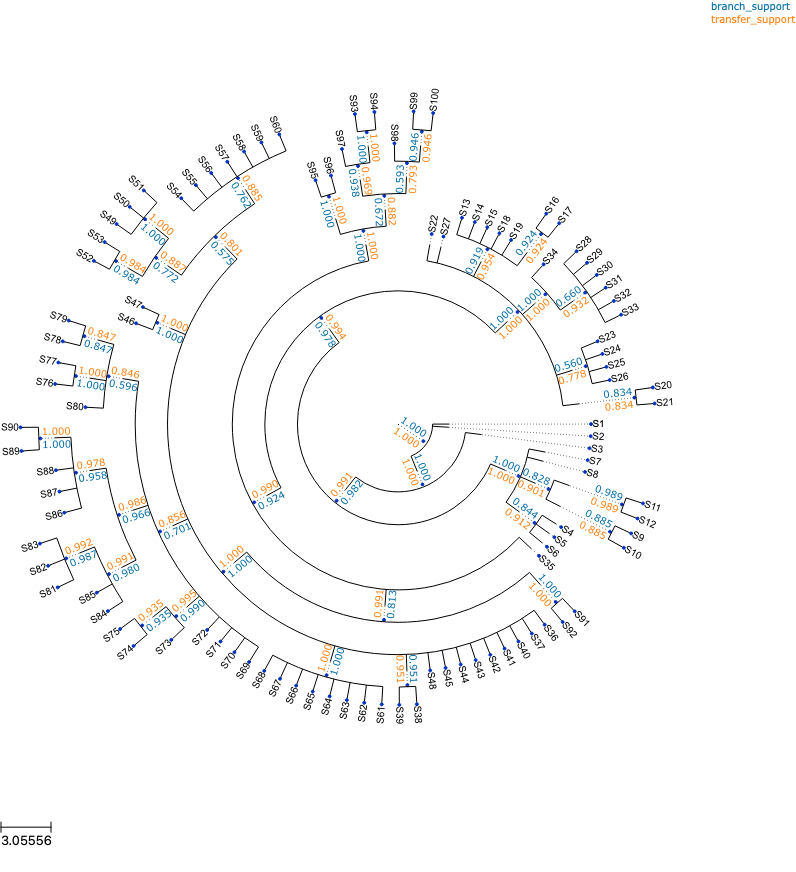

In [13]:
ts.rotation = 0
ts.mode='c'
t.render(file_name="%%inline",tree_style=ts)

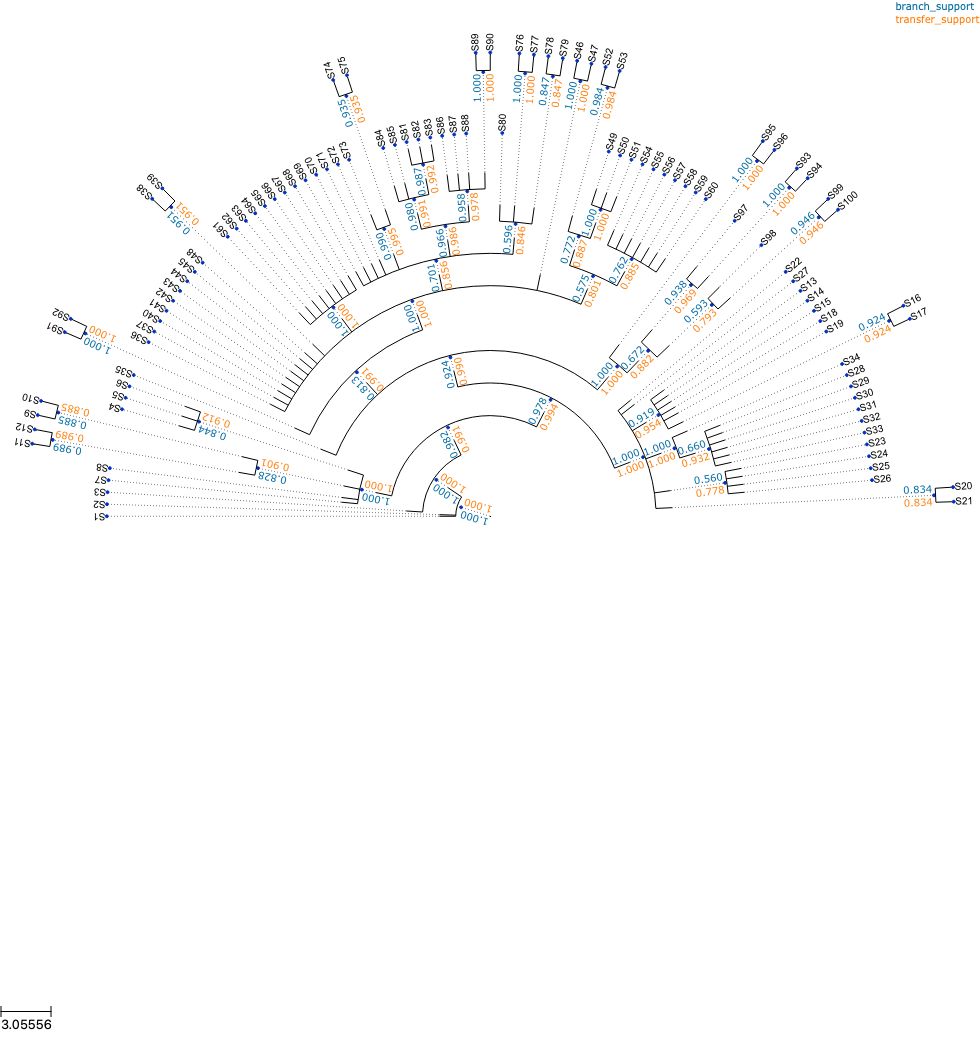

In [14]:
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180
t.render(file_name="%%inline",tree_style=ts)